# Gradient Boosting 

First we prepare some raw data:    

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
rng = np.random.RandomState(1234)

x = np.column_stack([
    rng.normal(1, 20, 120),
    rng.normal(3, 15, 120),
    rng.normal(7, 29, 120),   
])

And then create a dummy target variable y as a linear combination of x's.

In [16]:
y = np.log(x[:, 0]**2) + np.sin(x[:, 1]) + x[:, 2]

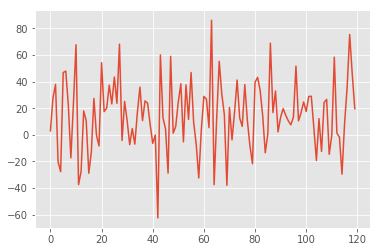

In [17]:
pd.Series(y).plot()

We can try to fit a simple linear regression model $\hat{y} = W^TX + b$ that minimizes the loss $L = \dfrac {1}{2}(y - \hat{y})^T(y - \hat{y})$.

In [18]:
x_train, y_train = x[:100, :], y[:100]
x_test, y_test = x[100:, :], y[100:]

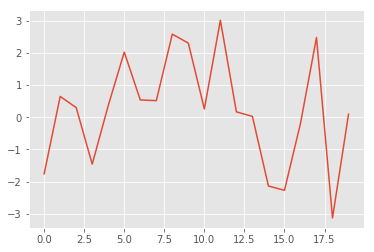

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
e = y_test - y_pred
pd.Series(e).plot()

In a GBM, we repeated apply Gradient Descent for the step above to minimize the loss functional $\dfrac {\partial L} {\partial \hat{y}} = (y - \hat{y})$.

In [20]:
from numpy.linalg import norm
from sklearn.metrics import r2_score

learning_rate = 0.5
max_iter = 100

coeffs = {}
y_train_ = y_train.copy()
diagnostics = []


for idx in range(1, max_iter+1):
    model = LinearRegression().fit(x_train, y_train_)
    coeffs[idx] = model.coef_ 
    
    y_pred = model.predict(x_train)
    r2_train = r2_score(y_train_, y_pred)
    avg_pred_error_train = np.mean(y_train_ - y_pred)
        
    y_train_ = y_pred - learning_rate * (y_train - y_pred)
    
    test_pred = model.predict(x_test)
    r2_test = r2_score(y_test, test_pred)    
    avg_pred_error_test = np.mean(y_test - test_pred)
    
    diagnostics.append({
        'r2_train': r2_train, 
        'r2_test': r2_test, 
        'avg_pred_error_train': avg_pred_error_train,
        'avg_pred_error_test': avg_pred_error_test
    })
    
    if idx > 1:
        norm_delta = norm(coeffs[idx-1] - coeffs[idx])
        if norm_delta > 1E-10:
            print("GBM terminated at iteration: {}".format(idx))
            break
        

GBM terminated at iteration: 32


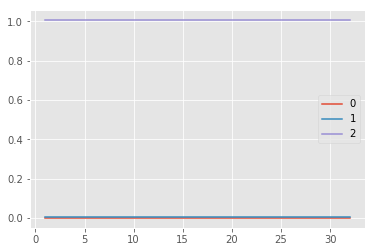

In [21]:
pd.DataFrame.from_dict(coeffs, orient='index').plot()

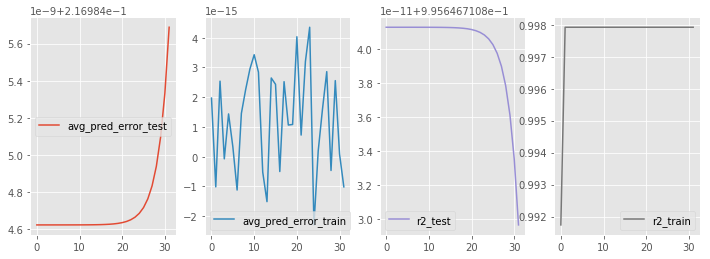

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax = pd.DataFrame(diagnostics).plot(ax=ax, subplots=True)